<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#AB-Testing" data-toc-modified-id="AB-Testing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>AB-Testing</a></span></li></ul></div>

# AB-Testing

![cats](images/cats.jpeg)


Imaginad que somos los cientificos de datos de la empresa de videojuegos Tactile Entertainment. Los desarrolladores del juego Cookie Cats pretenden introducir un cambio en el juego para aumentar la retencion de los jugadores. En cierto nivel del juego los jugadores se encuentran una puerta que les obliga a esperar o a pagar la app. Actualmente la puerta se encuentra en nivel 30 y se pretende pasar al nivel 40, para comprobar la retencion a 1 y 7 dias. Antes de realizar el cambio definitivo en el juego se raliza un test AB.

Los datos estan alojados en `data/cookie_cats.csv`. Nuestro grupo de control sera la version actual `gate_30` y el grupo de tratamiento sera la version `gate_40`. Debemos realizar el test para 1 dia de retencion `retention_1` y para 7 dias `retention_7`.

In [48]:
# librerias

import pandas as pd
import numpy as np

from statsmodels.stats.proportion import proportions_ztest, proportion_confint
from scipy.stats import norm, sem

import pylab as plt

import warnings
warnings.simplefilter('ignore')


import numpy as np
import pylab as plt
plt.rcParams['figure.figsize']=(15, 8)

from scipy.stats import bernoulli, beta   


import bayes

In [116]:
# datos
cokdf=pd.read_csv("data/cookie_cats.csv")
test=pd.read_csv("data/test.csv")
control=pd.read_csv("data/control.csv")
control

,Unnamed: 0,Unnamed: 0.1,Tiempo_Control(sec),Clicks,Edad,Sexo,Bool_control
0,0,0,80,14,39,F,True
1,1,1,120,15,41,F,False
2,2,2,55,20,25,F,True
3,3,3,35,8,30,M,True
4,4,4,27,7,27,F,True
5,5,5,99,7,68,M,False
6,6,6,106,9,64,M,False
7,7,7,86,21,32,F,False
8,8,8,26,8,35,F,True
9,9,9,70,15,34,M,True


In [118]:
 len(control["Bool_control"]), sum(control["Bool_control"]),    len(test["Bool_test"]), sum(test["Bool_test"])

(15, 10, 15, 12)

In [16]:
gate40=cokdf[cokdf["version"]=="gate_40"]
gate30=cokdf[cokdf["version"]=="gate_30"]


"chek there is no duplicated users"

In [20]:
set40=set(gate40["userid"])
set30=set(gate30["userid"])

intersection_result = set30 & set40
intersection_result

set()

TAKE SAME SIZE SAMPLES

In [44]:
gate40=cokdf[["userid","retention_1", "retention_7"]][cokdf["version"]=="gate_40"]
gate30=cokdf[["userid","retention_1", "retention_7"]][cokdf["version"]=="gate_30"]


gate40=gate40.sample(len(gate30))

len(gate40), len(gate30)

(44700, 44700)

para control gate30

In [69]:
conv_1=sum(gate30["retention_1"])
conv_7=sum(gate30["retention_7"])

# Creating the DataFrame contig_df
contig30_df = pd.DataFrame({
    "retention_1": [len(gate30["retention_1"]), conv_1],
    "retention_7": [len(gate30["retention_7"]), conv_7],
}).T
contig30_df.columns=["impr", "conv"]
contig30_df

,impr,conv
retention_1,44700,20034
retention_7,44700,8502


In [78]:
conv_1=sum(gate40["retention_1"])
conv_7=sum(gate40["retention_7"])

# Creating the DataFrame contig_df
contig40_df = pd.DataFrame({
    "retention_1": [len(gate40["retention_1"]), conv_1],
    "retention_7": [len(gate40["retention_7"]), conv_7],
}).T
contig40_df.columns=["impr", "conv"]
contig40_df

,impr,conv
retention_1,44700,19784
retention_7,44700,8146


In [67]:
contig30_df.iloc[0]["impr"]

44700

### CR: CONVERSION RATES - RETENTION 1:


In [119]:
len(control["Bool_control"]), sum(control["Bool_control"]),    len(test["Bool_test"]), sum(test["Bool_test"])

(15, 10, 15, 12)

In [120]:
# CR: CONVERSION RATES - RETENTION 1:

imps_ctrl = 15
convs_ctrl = 10

imps_test = 15
convs_test = 12

CR_ctrl = convs_ctrl/imps_ctrl
CR_test = convs_test/imps_test

f'Tasas conversion: Control: {CR_ctrl}, Test: {CR_test}'

'Tasas conversion: Control: 0.6666666666666666, Test: 0.8'

In [121]:
# a prioris

a_C, b_C = 1+convs_ctrl, 1+imps_ctrl-convs_ctrl

a_T, b_T = 1+convs_test, 1+imps_test-convs_test


beta_control = beta(a_C, b_C)

beta_test = beta(a_T, b_T)

In [122]:
beta_control.mean(), beta_test.mean()


(0.6470588235294118, 0.7647058823529411)

In [129]:
x=np.linspace(0.2,1.3, 100)
def plot(betas, nombres):
    
    for bet, nom in zip(betas, nombres):
        
        y=bet.pdf(x)
        y_media=bet.mean()
        y_std=bet.std()
        
        plt.plot(x, y, label='{}, tasa de conv: {:.2f} $\pm$ {:.4f}'.format(nom, y_media, y_std))
        plt.yticks([])
        
    plt.legend()
    plt.show();



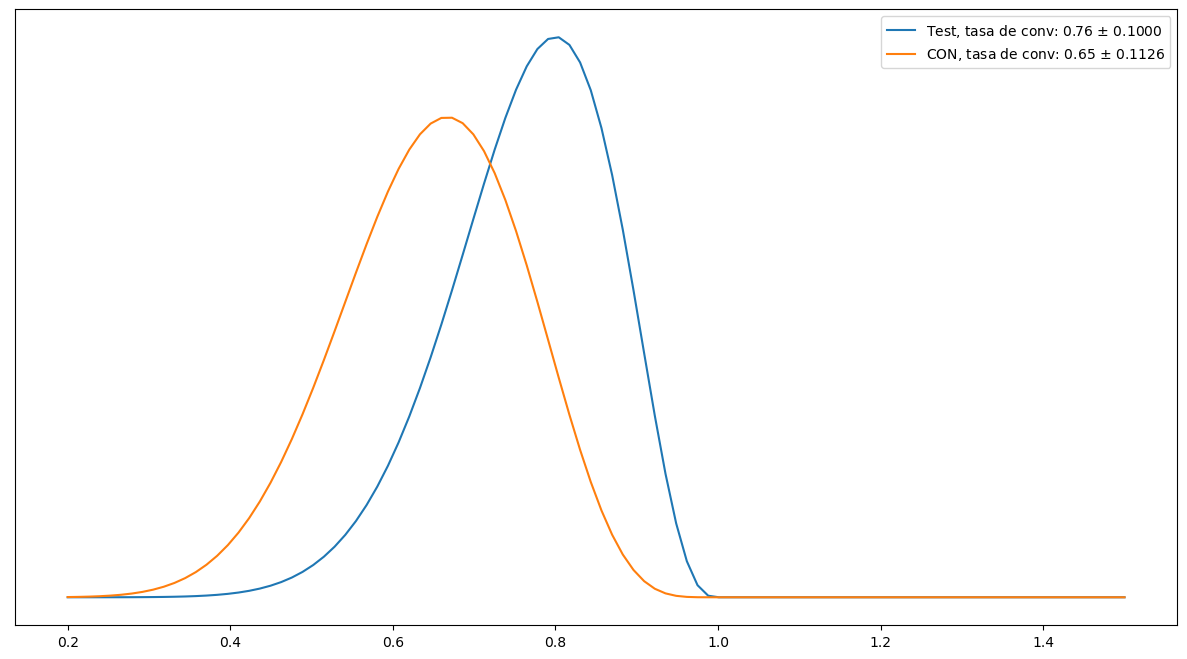

In [128]:
plot([beta_test, beta_control], ['Test', 'CON'])

In [131]:
salto = (beta_control.mean() - beta_test.mean())/beta_control.mean()
salto = (beta_test.mean() - beta_control.mean())/beta_control.mean()

salto

0.18181818181818168

In [132]:
# PROBABIDAD DE QUE EL CONTROL (GATE SEMANA 30) TENGA MAYOR RETENCION EN LA SEMANA 1 QUE EL TEST (GATE SEMANA 40)

bayes.calc_prob(beta_control, beta_test)

0.21657397107897786

### CR: CONVERSION RATES - RETENTION 7

In [105]:

imps_ctrl = contig30_df.iloc[1]["impr"]
convs_ctrl = contig30_df.iloc[1]["conv"]

imps_test = contig40_df.iloc[1]["impr"]
convs_test = contig40_df.iloc[1]["conv"]

CR_ctrl = convs_ctrl/imps_ctrl
CR_test = convs_test/imps_test

f'Tasas conversion: Control: {CR_ctrl}, Test: {CR_test}'

'Tasas conversion: Control: 0.19020134228187918, Test: 0.18223713646532438'

In [106]:
# a prioris

a_C, b_C = 1+convs_ctrl, 1+imps_ctrl-convs_ctrl

a_T, b_T = 1+convs_test, 1+imps_test-convs_test


beta_control = beta(a_C, b_C)

beta_test = beta(a_T, b_T)

In [107]:
beta_control.mean(), beta_test.mean()


(0.19021520289919913, 0.1822513534070064)

In [108]:
x=np.linspace(0.172,0.2, 100)
def plot(betas, nombres):
    
    for bet, nom in zip(betas, nombres):
        
        y=bet.pdf(x)
        y_media=bet.mean()
        y_std=bet.std()
        
        plt.plot(x, y, label='{}, tasa de conv: {:.2f} $\pm$ {:.4f}'.format(nom, y_media, y_std))
        plt.yticks([])
        
    plt.legend()
    plt.show();

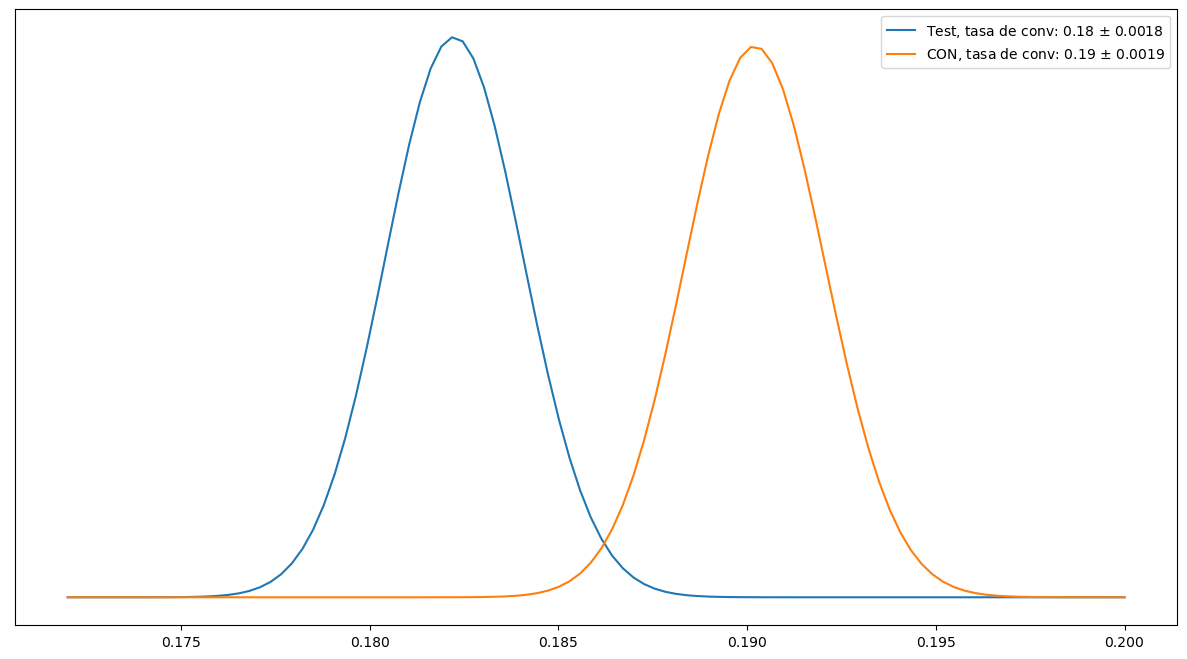

In [109]:
plot([beta_test, beta_control], ['Test', 'CON'])

In [103]:
salto = (beta_control.mean() - beta_test.mean())/beta_control.mean()

salto

0.041867576149594174

In [104]:
# PROBABIDAD DE QUE EL CONTROL (GATE SEMANA 30) TENGA MAYOR RETENCION EN LA SEMANA 7 QUE EL TEST (GATE SEMANA 40)

bayes.calc_prob(beta_control, beta_test)

0.9988879627928254

## conclusion

cambiar al gate 40 seria muy mala idea, 